In [ ]:
!pip install Arabic-Stopwords
!pip install arabic-reshaper
!pip install python-bidi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import FileHandler as Fh
import Requests as Req
import Preprocess as Pre
import Visualization as Vs
import FeatureExtraction as Fe
import Utils as Utl
import SGDClassifier_Model as SGD_clf
import SVMClassifier_Model as SVM_clf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# csv_file_path = "/content/drive/MyDrive/Dataset/dialect_dataset.csv"
# df = Fh.read_csv(csv_file_path)
# save_directory_path = "Dataset"
# Req.get_dataset_df(df, save_directory_path)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


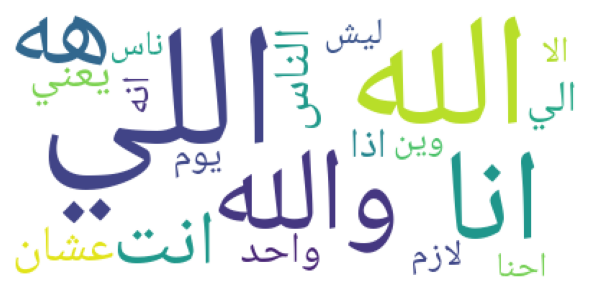

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


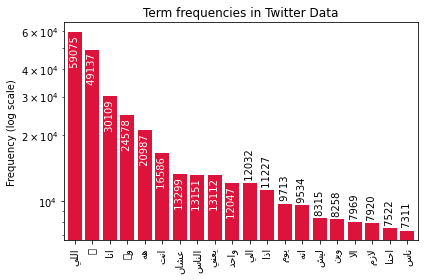

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


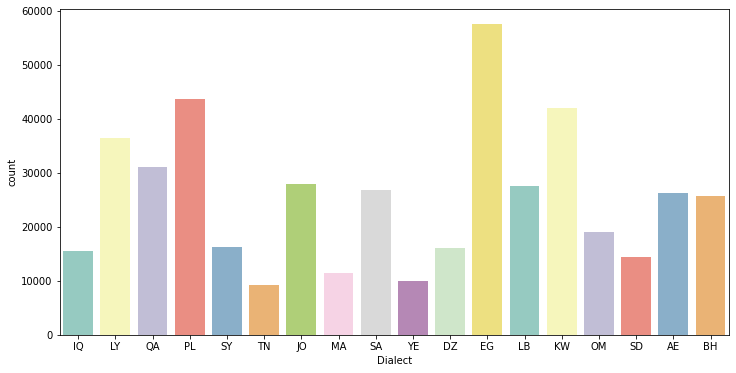

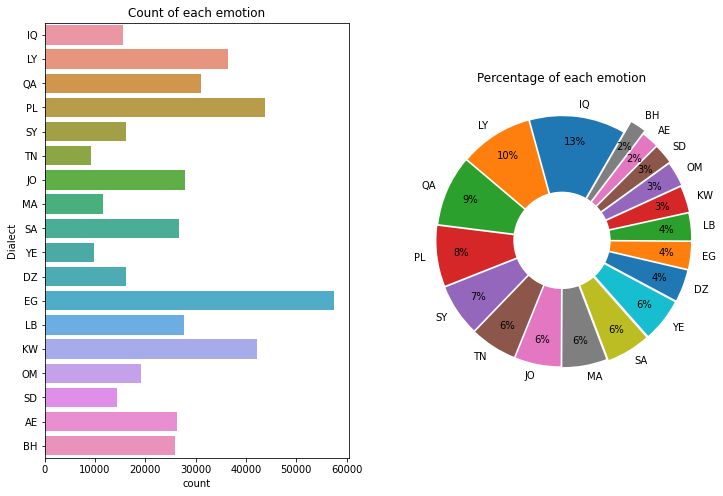

In [ ]:
csv_file_path = "/content/Dataset/csv_text_dataset.csv"
df = Fh.read_arabic_csv(csv_file_path)

df = Pre.preprocess_df(df, col="Text")

Vs.generate_word_cloud(df, "Text")
Vs.most_freq_word(df, "Text")

Vs.get_classes_freq(df, "Dialect")
Vs.get_classes_percentage(df, "Dialect")

train, val = Utl.split_dataset(df, y_col="Dialect", test_size=0.06, with_stratify=True, shuffle=True)

In [ ]:
X_train = train["Text"].values
y_train = train["Dialect"].values
X_val = val["Text"].values
y_val = val["Dialect"].values

label_encoder = Utl.get_label_encoder_obj(y_train)
y_train = Utl.get_y_label_encoder(label_encoder, y_train)
y_val = Utl.get_y_label_encoder(label_encoder, y_val)

num_classes = Utl.get_nb_classes(y_train)

count_vect = Fe.CountVectorizer_fit(X_train, ngram_range=(1, 2))
X_train_counts = Fe.CountVectorizer_transform(count_vect, X_train)
X_val_counts = Fe.CountVectorizer_transform(count_vect, X_val)

tf_transformer = Fe.TfidfTransformer_fit(X_train_counts)
X_train_tfidf = Fe.TfidfTransformer_transform(tf_transformer, X_train_counts)
X_val_tfidf = Fe.TfidfTransformer_transform(tf_transformer, X_val_counts)

preprocessing_pipeline = Fe.fit_preprocessing_pipeline(X_train, ngram_range=(1, 2), use_idf=True)
directory = "Weights"
preprocessing_pipeline_file = "preprocessing_pipeline.pkl"
Utl.save_model_pkl(preprocessing_pipeline, directory, preprocessing_pipeline_file)
preprocessing_pipeline_file = "Weights/preprocessing_pipeline.pkl"
preprocessing_pipeline = Utl.load_model_pkl(preprocessing_pipeline_file)

X_train_tfidf = Fe.transform_preprocessing_pipeline(preprocessing_pipeline, X_train)
X_val_tfidf = Fe.transform_preprocessing_pipeline(preprocessing_pipeline, X_val)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

Model take 929.6822738647461 S


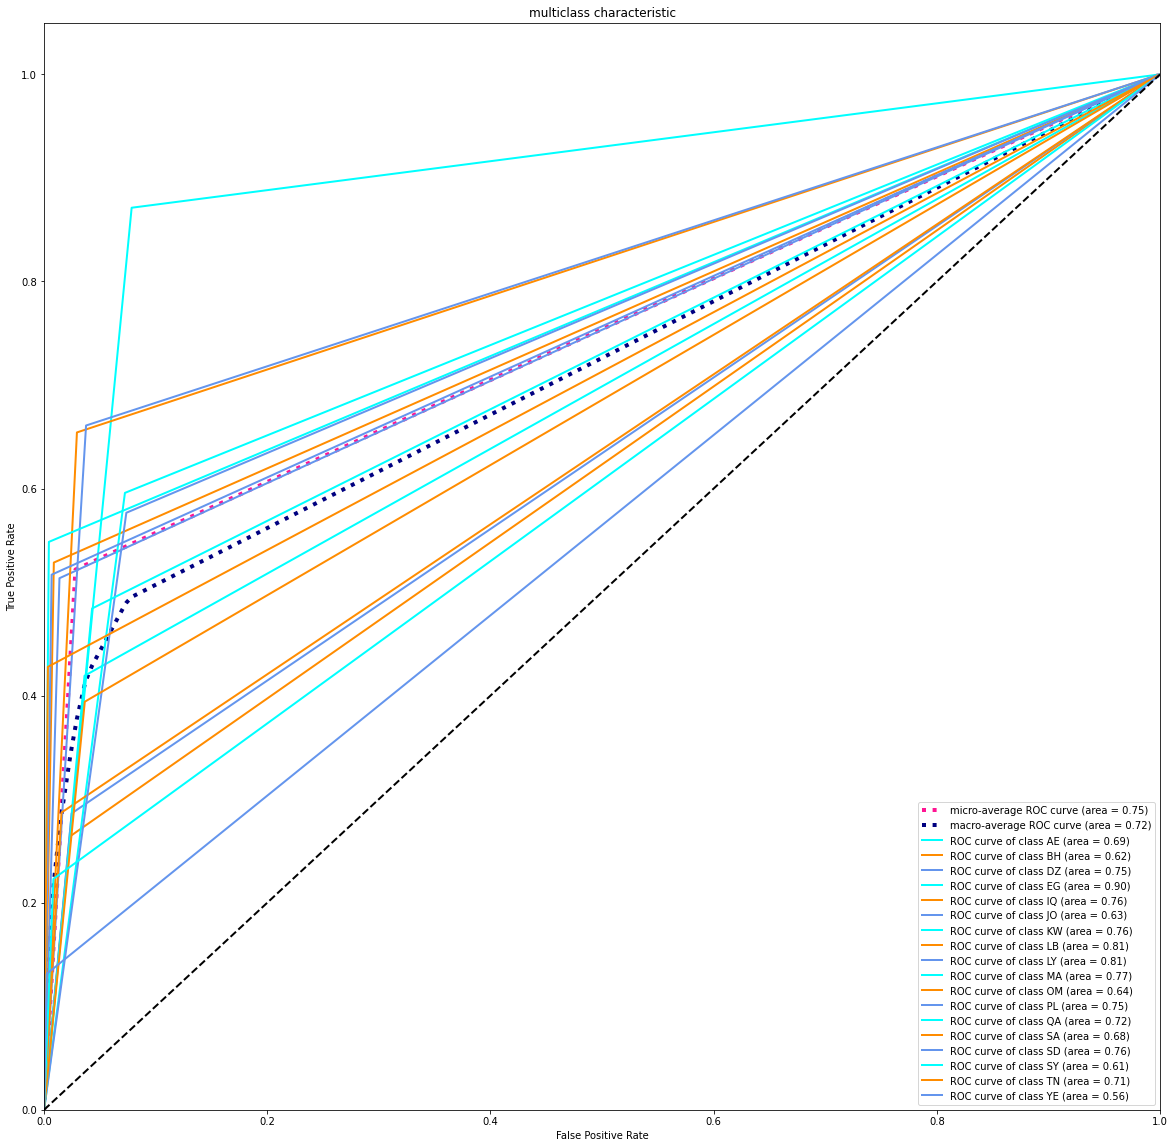

Accuracy:  0.5217945914425249
Precision::  0.5217945914425249
Recall::  0.5217945914425249
F1_Score::  0.5217945914425249

Macro precision_recall_fscore_support (macro) average
(0.5424263125397781, 0.46571782658750416, 0.48448821125419017, None)

Macro precision_recall_fscore_support (micro) average
(0.5217945914425249, 0.5217945914425249, 0.5217945914425249, None)

Macro precision_recall_fscore_support (weighted) average
(0.5209759069974509, 0.5217945914425249, 0.5076294927100367, None)

Confusion Matrix

Classification Report
              precision    recall  f1-score   support

          AE       0.41      0.42      0.42      1577
          BH       0.41      0.26      0.32      1549
          DZ       0.58      0.51      0.54       970
          EG       0.62      0.87      0.72      3455
          IQ       0.68      0.53      0.59       929
          JO       0.43      0.29      0.34      1673
          KW       0.45      0.60      0.52      2526
          LB       0.59      0.65

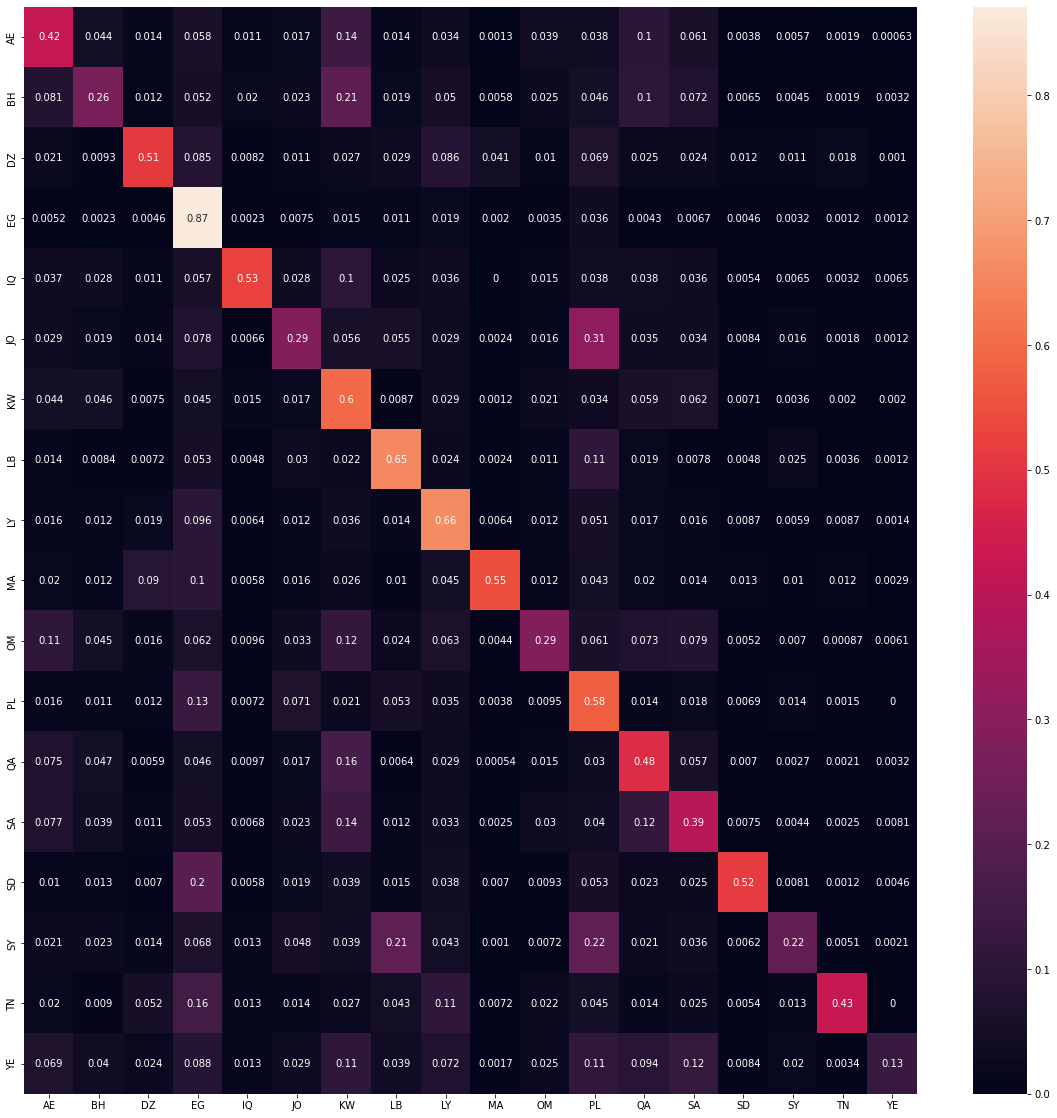

In [ ]:
model, _ = SGD_clf.fit_SGDClassifier(X_train_tfidf, y_train)

directory = "Weights"
SGD_clf_file = "SGD_clf.pkl"
Utl.save_model_pkl(model, directory, SGD_clf_file)
SGD_clf_file = "Weights/SGD_clf.pkl"
model = Utl.load_model_pkl(SGD_clf_file)

y_hat = model.predict(X_val_tfidf)
Utl.get_prediction_results(y_val, y_hat, label_encoder, num_classes)
y_hat = Utl.predict(model, X_val_tfidf)

In [ ]:
# model, _ = SVM_clf.fit_SVMClassifier(X_train_tfidf, y_train)
# directory = "Weights"
# SVM_clf_file = "SVM_clf.pkl"
# Utl.save_model_pkl(model, directory, SVM_clf_file)
# SVM_clf_file = "Weights/SVM_clf.pkl"
# model = Utl.load_model_pkl(SVM_clf_file)

# y_hat = model.predict(X_val_tfidf)
# Utl.get_prediction_results(y_val, y_hat, label_encoder, num_classes)
# y_hat = Utl.predict(model, X_val_tfidf)